In [2]:
import os

current_directory = os.getcwd()


file_path = os.path.join(current_directory, "2__10916__табл данные.txt")

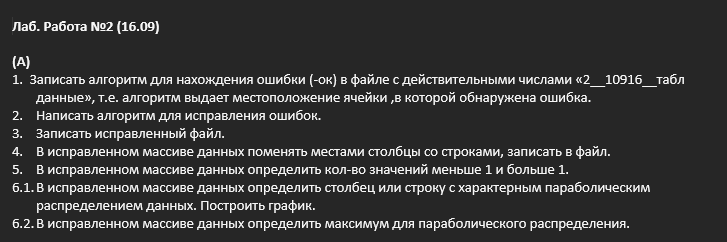

In [25]:
from matplotlib import pyplot as plt

def find_errors(filename):
  errors = []
  with open(filename, 'r') as file:
    lines = file.readlines()
    for row_index, line in enumerate(lines):
      values = line.strip().split()
      for col_index, value in enumerate(values):
        try:
          float(value)
        except ValueError:
          print('(',row_index,';',col_index,'):\t',value) 
          errors.append((row_index, col_index))
  return errors


def correct_errors(filename):
  data = []
  with open(filename, 'r') as file:
    lines = file.readlines()
    for line in lines:
      values = line.strip().split()
      data.append([float(v) if v.replace('.', '', 1).isdigit() else np.nan for v in values])

  # Замена NaN на среднее значение соседей
  data = np.array(data)
  nan_indices = np.argwhere(np.isnan(data))
  for row, col in nan_indices:
    neighbors = []
    if row > 0: neighbors.append(data[row - 1, col])  # верхний сосед
    if row < data.shape[0] - 1: neighbors.append(data[row + 1, col])  # нижний сосед
    if col > 0: neighbors.append(data[row, col - 1])  # левый сосед
    if col < data.shape[1] - 1: neighbors.append(data[row, col + 1])  # правый сосед
    neighbors = [n for n in neighbors if not np.isnan(n)]
    data[row, col] = np.mean(neighbors) if neighbors else 0

  return data


def save_corrected_data(data, filename):
  with open(filename, 'w') as file:
    for row in data:
      file.write(" ".join(map(str, row)) + "\n")

def transpose_data(data):
  return np.transpose(data)


def count_values(data):
  less_than_one = np.sum(data < 1)
  greater_than_one = np.sum(data > 1)
  return less_than_one, greater_than_one


import numpy as np


def is_parabolic(y_coords, threshold=0.95):
  # Генерируем x-координаты (линейная последовательность 0, 1, 2, ..., len(y_coords)-1)
  x_coords = np.arange(len(y_coords))

  # Аппроксимация второго порядка
  coeffs = np.polyfit(x_coords, y_coords, 2)
  poly = np.poly1d(coeffs)

  # Предсказанные значения по аппроксимированной параболе
  y_pred = poly(x_coords)

  # Вычисляем коэффициент детерминации R^2
  ss_res = np.sum((y_coords - y_pred) ** 2)  # Сумма квадратов остатков
  ss_tot = np.sum((y_coords - np.mean(y_coords)) ** 2)  # Сумма полных квадратов

 

  r2 = 1 - (ss_res / ss_tot)  # Коэффициент детерминации

  # Проверяем, если R^2 больше порогового значения
  if r2 >= threshold:
    return True, coeffs  # Это парабола и возвращаем коэффициенты
  else:
    return False  # Это не парабола

def find_maximum_parabola(data, col_index):
  x = np.arange(data[col_index,:].shape[0])
  y = data[col_index,:]

  # Полиномиальная аппроксимация
  coeffs = np.polyfit(x, y, 2)

  # Коэффициенты a, b, c для параболы ax^2 + bx + c
  a, b, c = coeffs

  # Максимум параболы: x_max = -b / (2a)
  if a != 0:  # Проверяем, что это действительно парабола
    x_max = -b / (2 * a)
    y_max = np.poly1d(coeffs)(x_max)  # Значение y в точке максимума
    return x_max, y_max
  else:
    return None, None  # Это прямая, а не парабола


def plot_parabolic(data, col_index):
  x = np.arange(data[col_index, :].shape[0])
  y = data[col_index, :]

  # Полиномиальная аппроксимация
  coeffs = np.polyfit(x, y, 2)
  poly = np.poly1d(coeffs)
  fit_values = poly(x)

  # Построение графика
  plt.plot(x, fit_values, '-', label='Аппроксимационная parabola')
  plt.plot(x, y, '-', label='Базовая parabola')
  plt.legend()
  plt.show()

( 15 ; 11 ):	 0.0б3
( 26 ; 6 ):	 3.2О8
( 29 ; 10 ):	 0.1О8
( 45 ; 6 ):	 3.2б1
( 58 ; 3 ):	 1.9б1
Значений меньше 1: 562, больше 1: 322
1
2
3
Столбец с наилучшим параболическим распределением: 4
Максимум параболы достигается при x = (34.44891202782091, 3.523237921486421)


C:\Users\bulyn\AppData\Local\Temp\ipykernel_19356\2613356983.py:76: RuntimeWarning: divide by zero encountered in scalar divide
  r2 = 1 - (ss_res / ss_tot)  # Коэффициент детерминации


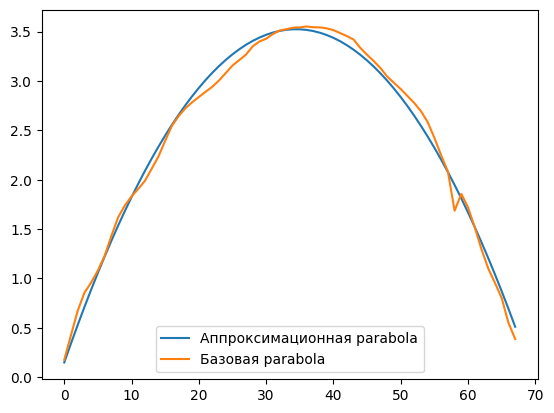

4
5
6
7
8
9
10
11


In [26]:
filename = r"C:\Users\bulyn\Documents\GitHub\PAD\lab2\2__10916__табл данные.txt"

# 1. Найти ошибки
find_errors(filename)

# 2. Исправить ошибки
data = correct_errors(filename)

# 3. Записать исправленный файл
save_corrected_data(data, r"C:\Users\bulyn\Documents\GitHub\PAD\corrected_data.txt")

# 4. Транспонировать данные
transposed_data = transpose_data(data)
save_corrected_data(transposed_data, r"C:\Users\bulyn\Documents\GitHub\PAD\transpose_data.txt")

# 5. Подсчитать значения
less_than_one, greater_than_one = count_values(data)
print(f"Значений меньше 1: {less_than_one}, больше 1: {greater_than_one}")

# 6.1. Найти столбец с параболическим распределением и построить график

for i in range(1, len(transposed_data)-1):
	print(i)
	best_col = is_parabolic(transposed_data[i,:])
	if best_col:
		print(f"Столбец с наилучшим параболическим распределением: {i + 1}")
		# 6.2. Найти максимум параболы
		x_max = find_maximum_parabola(transposed_data, i)
		print(f"Максимум параболы достигается при x = {x_max}")
		plot_parabolic(transposed_data, i)

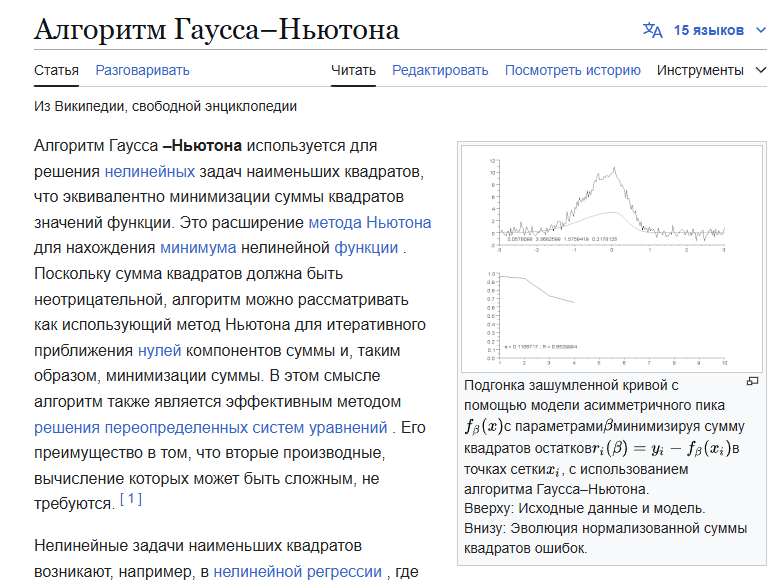